In [1]:
(ql:quickload "kenzo")
(in-package :cat)

To load "kenzo":
  Load 1 ASDF system:
    kenzo
; Loading "kenzo"



#<PACKAGE "CAT">

# The Homology Module

This chapter is devoted to the description of the functions for computing the homology groups of a chain complex.

## List of functions

`chcm-homology` *chcm dim* *[Function]*
> Return a description of the $\mathbb{Z}$-homology group in dimension *dim* of the chain complex *chcm* in terms of *components* of the form $\mathbb{Z}$ or $\mathbb{Z}/{n\, \mathbb{Z}}$. The desired homology group is the direct sum of these  components. No canonical presentation is looked for, so that, if for instance, a homology group is $\mathbb{Z}/{6\, \mathbb{Z}}$, it can be displayed as one component $\mathbb{Z}/{6\, \mathbb{Z}}$ or two components $\mathbb{Z}/{2\, \mathbb{Z}}$ and $\mathbb{Z}/{3\, \mathbb{Z}}$. On the other hand, if the component part  is void, this  means  the homology group is the null group. The function `chcm-homology` implements the usual algorithms to compute the homology group associated to two integer matrices, the composite of which is null. The current version is verbose: for each group asked for, the program displays the rank of each integer matrix and each generator of the source module. Timing indications are also given. In the examples, only the  components are printed.

`chcm-homology-gen` *chcm n* *[Function]*
> This function computes the homology group in dimension $n$ of the chain complex *chcm* and prints a generator of degree $n$ in *chcm* for each component of the group, that is, a combination of the  basis elements of degree $n$ of the chain complex, some cycle representing the corresponding homology class.

`chcm-mat` *chcm n* *[Function]*
> Return the matrix of the linear homomorphism  $d_n: C_n \rightarrow C_{n-1}$, where $C_n$ is the $n$-th chain group of the chain complex *chcm*. More precisely, each column  of this matrix contains the integer coefficients in the basis of $C_{n-1}$ of the image by $d_n$ of each basis element of $C_n$. So the number of rows (resp. columns) of the matrix is the number of elements of the basis of $C_{n-1}$ (resp. $C_n$). The homology group ${\cal H}_n={\cal Z}_n/{\cal B}_n$ is computed from the two matrices `MZ` $=$ `chcm-mat` *(chcm,n)* and `NB` $=$ `chcm-mat` *(chcm, n+1)*. By well known algorithms on matrix reduction (**S. MacLane & G. Birkhoff**, *Algebra*, The MacMillan Company, 1967), the matrix `MZ` is used to find a basis for the kernel ${\cal Z}_n$ and the matrix `NB`, to find in ${\cal Z}_n$ a presentation of the group ${\cal H}_n={\cal Z}_n/{\cal B}_n$ by generators and relations. This is performed by the internal function `homologie` (beware: not `homology`!).

`homology` *chcm degr1* `&optional (`*degr2* `(1+` *degr1*`))` *[Method]*
> Compute the homology groups from $degr_1$ to $degr_2-1$ (default: only $degr_1$, if *degr2* is omitted) of the right chain complex of the homotopy equivalence contained in the slot `:efhm` of the
chain complex instance *chcm*. At the creation of the chain complex, this slot is unbound and is set during execution by an adequate CLOS method. If this slot cannot be  bound, an error is returned and the homology groups cannot be computed. A more elaborated explanation of the mechanism used by the function `homology` is given in the  section: **The general method for computing homology groups.**


## Example

Let us get the homology groups for the example `diabolo` of the chapter 1.

In [2]:
(def diabolo (build-chcm
              :cmpr #'s-cmpr
              :basis #'(lambda (dmn)
                               (case dmn
                                   (0 '(s0 s1 s2 s3 s4 s5))
                                   (1 '(s01 s02 s12 s23 s34 s35 s45))
                                   (2 '(s345))
                                   (otherwise nil)))
              :bsgn 's0
              :intr-dffr #'(lambda (dmn gnr)
                                   (unless (<= 0 dmn 2)
                                       (error "Incorrect dimension for diabolo-dp."))
                                   (case dmn
                                       (0 (cmbn -1))  ; Note the null combination of degree -1
                                       (1 (case gnr
                                              (s01 (cmbn 0 -1 's0 1 's1))
                                              (s02 (cmbn 0 -1 's0 1 's2))
                                              (s12 (cmbn 0 -1 's1 1 's2))
                                              (s23 (cmbn 0 -1 's2 1 's3))
                                              (s34 (cmbn 0 -1 's3 1 's4))
                                              (s35 (cmbn 0 -1 's3 1 's5))
                                              (s45 (cmbn 0 -1 's4 1 's5))))
                                        (2 (case gnr
                                               (s345 (cmbn 1 1 's34 -1 's35 1 's45))))
                                       (otherwise (error "Bad generator for complex diabolo"))))
              :strt :GNRT
              :orgn '(diabolo-for-example)))

[K1 Chain-Complex]

In [3]:
(chcm-homology diabolo 0)


Computing boundary-matrix in dimension 0.
Rank of the source-module : 6.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/6 (dimension 0) :
S0 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 2/6 (dimension 0) :
S1 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 3/6 (dimension 0) :
S2 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 4/6 (dimension 0) :
S3 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 5/6 (dimension 0) :
S4 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 6/6 (dimension 0) :
S5 
End of computing.


Computing boundary-matrix in dimension 1.
Rank of the source-module : 7.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/7 (dimension 1) :
S01 
End of computing.


;; Clock

NIL

In [4]:
(chcm-homology diabolo 1)


Computing boundary-matrix in dimension 1.
Rank of the source-module : 7.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/7 (dimension 1) :
S01 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 2/7 (dimension 1) :
S02 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 3/7 (dimension 1) :
S12 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 4/7 (dimension 1) :
S23 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 5/7 (dimension 1) :
S34 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 6/7 (dimension 1) :
S35 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 7/7 (dimension 1) :
S45 
End of computing.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;;

NIL

In [5]:
(chcm-homology diabolo 2)


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/1 (dimension 2) :
S345 
End of computing.


Computing boundary-matrix in dimension 3.
Rank of the source-module : 0.




Homology in dimension 2 :



---done---

NIL

Another simple example is the following  2-chain  complex  corresponding to the well known *dunce hat*. We shall see later in the chapter `Simplicial Sets` a much more elegant method to describe this object.

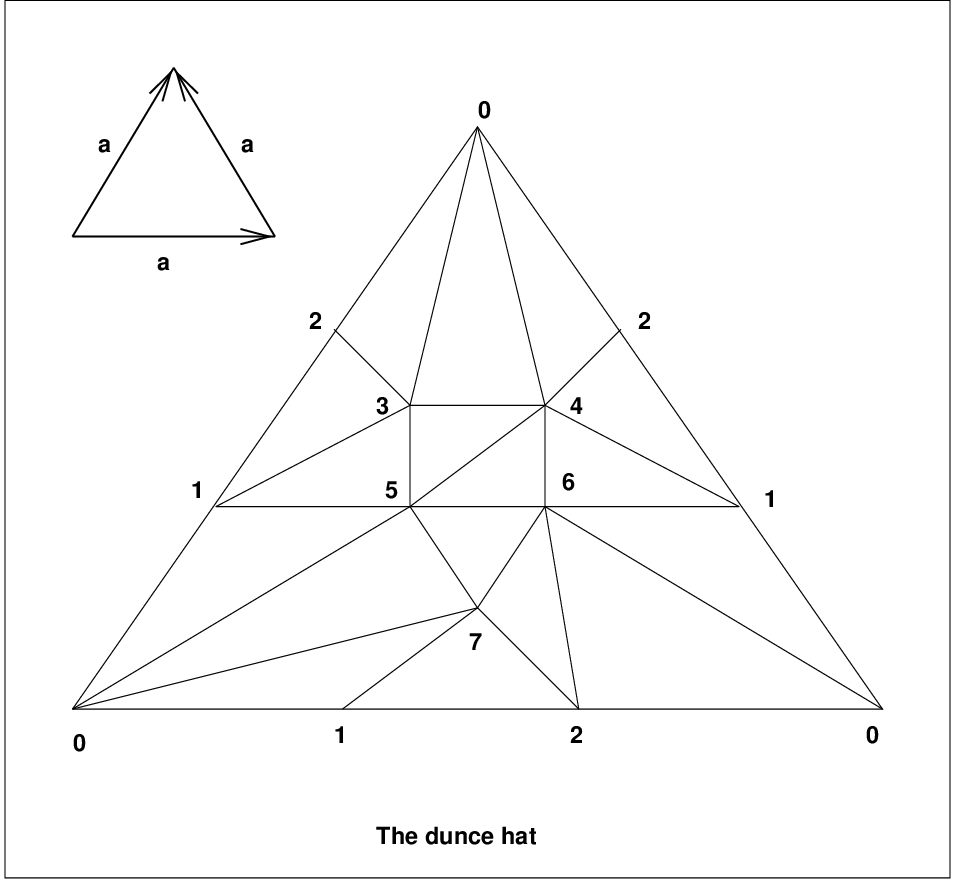

In [6]:
(cl-jupyter-user:png-from-file "dunce.png")

The diagram shows a permissible triangulation. For the generators, we have  chosen lists rather symbols: a vertex $s_i$ is represented as `(i)`, an edge $s_is_j$ as `(i j)` and a triangle $s_is_js_k$ as `(i j k)`. The enumeration of the elements of the basis is a little  cumbersome but defining  the boundary homomorphism is very easy, bearing in mind the boundary rule:

$$
\mathbf{d}[s_0s_1\ldots s_n] = \sum_{i=0}^n{(-1)^is_0s_1\ldots\widehat{s_i}\ldots s_n}.
$$

As for diabolo, the vertices are implicitly ordered.

In [7]:
(def duncehat-basis #'(lambda (dmn)
                              (case dmn
                                  (0 '((0) (1) (2) (3) (4) (5) (6) (7)))
                                  (1 '((0 1) (0 2) (0 3)
                                       (0 4) (0 5) (0 6)
                                       (0 7) (1 2) (1 3)
                                       (1 4) (1 5) (1 6)
                                       (1 7) (2 3) (2 4)
                                       (2 6) (2 7) (3 4)
                                       (3 5) (4 5) (4 6)
                                       (5 6) (5 7) (6 7)))
                                  (2 '((0 1 5) (0 1 6) (0 1 7)
                                       (0 2 3) (0 2 4) (0 2 6)
                                       (0 3 4) (0 5 7) (1 2 3)
                                       (1 2 4) (1 2 7) (1 3 5)
                                       (1 4 6) (2 6 7) (3 4 5)
                                       (4 5 6) (5 6 7)))
                                  (otherwise nil))))

#<FUNCTION (LAMBDA (DMN) :IN "/root/cl-jupyter/cl-jupyter.lisp") {10022917FB}>

In [8]:
(def duncehat-df #'(lambda (dmn gnr)
                           (case dmn
                               (0 (cmbn -1))
                               (1 (cmbn 0 -1 (list (first gnr)) 1 (rest gnr)))
                               (2 (cmbn 1 1 (list (first gnr) (second gnr))
                                         -1 (list (first gnr) (third gnr))
                                          1 (rest gnr)))
                               (otherwise nil))))

#<FUNCTION (LAMBDA (DMN GNR) :IN "/root/cl-jupyter/cl-jupyter.lisp") {10023AC59B}>

In [9]:
(def duncehat (build-chcm :cmpr #'l-cmpr
                          :basis duncehat-basis
                          :bsgn '(0)
                          :intr-dffr duncehat-df
                          :strt :gnrt
                          :orgn '(dunce hat)))

[K3 Chain-Complex]

In [10]:
(chcm-homology duncehat 0)


Computing boundary-matrix in dimension 0.
Rank of the source-module : 8.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/8 (dimension 0) :
(0) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 2/8 (dimension 0) :
(1) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 3/8 (dimension 0) :
(2) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 4/8 (dimension 0) :
(3) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 5/8 (dimension 0) :
(4) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 6/8 (dimension 0) :
(5) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 7/8 (dimension 0) :
(6) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 8

NIL

In [11]:
(chcm-homology duncehat 1)


Computing boundary-matrix in dimension 1.
Rank of the source-module : 24.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/24 (dimension 1) :
(0 1) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 2/24 (dimension 1) :
(0 2) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 3/24 (dimension 1) :
(0 3) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 4/24 (dimension 1) :
(0 4) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 5/24 (dimension 1) :
(0 5) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 6/24 (dimension 1) :
(0 6) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 7/24 (dimension 1) :
(0 7) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the bound

NIL

In [12]:
(chcm-homology duncehat 2)


Computing boundary-matrix in dimension 2.
Rank of the source-module : 17.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/17 (dimension 2) :
(0 1 5) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 2/17 (dimension 2) :
(0 1 6) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 3/17 (dimension 2) :
(0 1 7) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 4/17 (dimension 2) :
(0 2 3) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 5/17 (dimension 2) :
(0 2 4) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 6/17 (dimension 2) :
(0 2 6) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 7/17 (dimension 2) :
(0 3 4) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Compu

NIL

We remark the homology of this "dunce hat" is the homology of  one point. Good exercise: compute the $\pi_1$. A maximal "tree" is the path $01234567$, and the standard reduction process, for example $35~345$, etc., shows the $\pi_1$ is generated by the loop $0120$. The same sort of argument shows this loop is homotopic to its double, and therefore null-homotopic, so that finally $\pi_1 = 0$. A famous theorem of Whitehead then asserts our "dunce hat" is contractible, which is not really intuitive. The same result via the minimal triangulation of the dunce hat as a simplicial set is much easier.

Let us take again  the chain complex `duncehat`. The two matrices of the homomorphisms $d_1: C_1 \rightarrow C_0$ and $d_2: C_2 \rightarrow C_1$ are obtained by calling `chcm-mat`.

In [13]:
(def mz (chcm-mat duncehat 1))


Computing boundary-matrix in dimension 1.
Rank of the source-module : 24.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/24 (dimension 1) :
(0 1) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 2/24 (dimension 1) :
(0 2) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 3/24 (dimension 1) :
(0 3) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 4/24 (dimension 1) :
(0 4) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 5/24 (dimension 1) :
(0 5) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 6/24 (dimension 1) :
(0 6) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 7/24 (dimension 1) :
(0 7) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the bound


========== MATRIX 8 lines + 24 columns =====
L1=[C1=-1][C2=-1][C3=-1][C4=-1][C5=-1][C6=-1][C7=-1]
L2=[C1=1][C8=-1][C9=-1][C10=-1][C11=-1][C12=-1][C13=-1]
L3=[C2=1][C8=1][C14=-1][C15=-1][C16=-1][C17=-1]
L4=[C3=1][C9=1][C14=1][C18=-1][C19=-1]
L5=[C4=1][C10=1][C15=1][C18=1][C20=-1][C21=-1]
L6=[C5=1][C11=1][C19=1][C20=1][C22=-1][C23=-1]
L7=[C6=1][C12=1][C16=1][C21=1][C22=1][C24=-1]
L8=[C7=1][C13=1][C17=1][C23=1][C24=1]
========== END-MATRIX

In [14]:
(def nb (chcm-mat duncehat 2))


Computing boundary-matrix in dimension 2.
Rank of the source-module : 17.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/17 (dimension 2) :
(0 1 5) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 2/17 (dimension 2) :
(0 1 6) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 3/17 (dimension 2) :
(0 1 7) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 4/17 (dimension 2) :
(0 2 3) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 5/17 (dimension 2) :
(0 2 4) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 6/17 (dimension 2) :
(0 2 6) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 7/17 (dimension 2) :
(0 3 4) 
End of computing.


;; Clock -> 2017-10-08, 0h 52m 47s.
Compu


========== MATRIX 24 lines + 17 columns =====
L1=[C1=1][C2=1][C3=1]
L2=[C4=1][C5=1][C6=1]
L3=[C4=-1][C7=1]
L4=[C5=-1][C7=-1]
L5=[C1=-1][C8=1]
L6=[C2=-1][C6=-1]
L7=[C3=-1][C8=-1]
L8=[C9=1][C10=1][C11=1]
L9=[C9=-1][C12=1]
L10=[C10=-1][C13=1]
L11=[C1=1][C12=-1]
L12=[C2=1][C13=-1]
L13=[C3=1][C11=-1]
L14=[C4=1][C9=1]
L15=[C5=1][C10=1]
L16=[C6=1][C14=1]
L17=[C11=1][C14=-1]
L18=[C7=1][C15=1]
L19=[C12=1][C15=-1]
L20=[C15=1][C16=1]
L21=[C13=1][C16=-1]
L22=[C16=1][C17=1]
L23=[C8=1][C17=-1]
L24=[C14=1][C17=1]
========== END-MATRIX

In [15]:
(homologie mz nb)

NIL

## The general method for computing homology

Among the slots of the instance of an object inheriting the `CHAIN COMPLEX` class, a slot `efhm`
has been reserved to point (possibly) to a homotopy equivalence where the right bottom chain complex is effective. The function `homology` is designed to get the right bottom chain complex of the homotopy equivalence value of the slot. If the slot has been bound, then the homology groups are computed by the function `chcm-homology` as shown in the following definition:

```commonlisp
(DEFMETHOD HOMOLOGY ((chcm chain-complex) degr1 &optional (degr2 (1+ degr1)))
   (do ((degr degr1 (1+ degr)))
       ((>= degr degr2))
 -->   (chcm-homology (rbcc (efhm chcm)) degr)
       (terpri) (clock) (terpri)))
```

But, at the creation of the object, the slot `efhm` is  unbound and as soon as the `homology`
function tries to get the content of the slot `efhm` via the call `(efchm chcm)`, the *slot-unbound* mechanism of CLOS is triggered, calling at its turn a method `search-efhm` depending on the object. If no method is available for this object, `NIL` is returned. In the following chapters, we shall see that cases have been written for cartesian products, tensor products, suspensions, disk pasting, fibrations, loop spaces, and classifying spaces. The selection of the case is done thanks to the information contained in the comment list of the object (slot `orgn`). In each case, the `search-efhm` method builds - in general with a complex machinery, including a possible recursivity - a homotopy equivalence where the right bottom chain complex is *effective*. The slot `efhm` of the object is then settled and the homology group computation may begin. If `NIL` is returned, then  and only at this moment, the slot-unbound mechanism looks if the chain complex is finite (checking if a basis function exists). If this is the case, then the *trivial homotopy equivalence* is built upon the chain complex and this gives the value of the slot `efhm`. If there is no basis function,  meaning that probably the chain complex is locally effective, an error is returned.

*Remark.* The user may wonder why one does not  look first if the given object is effective. We recall simply that even in the case of an effective chain complex, it is sometimes possible to find another effective chain complex, homotopic to the first and whose number of basis elements, in any dimensions, is considerably smaller in comparison with the first one. A striking case will be shown in a further chapter, showing the application of the Eilenberg-Zilber theorem to a cartesian product.


### Example

*The reading of this subsection may be postponed until a full reading of this user's guide.* The following examples  show how are filled the slots `efhm` of the various objects. Starting from the sphere $S^2$, we  verify first that the *efhm* slot is unbound. Then we ask for ${\cal H}_1$ and verify that, though there is a finite basis, `Kenzo` has nevertheless built a trivial homotopy equivalence on this object.

In [16]:
(cat-init)


---done---

NIL

In [17]:
(def s2 (sphere 2))

[K1 Simplicial-Set]

In [18]:
(inspect s2)


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION SPHERE-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN SPHERE-BASIS) {100276F5AB}>
2. BSGN: *
3. DFFR: [K2 Morphism (degree -1): K1 -> K1]
4. GRMD: [K1 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 1
7. ORGN: (SPHERE 2)
8. CPRD: [K5 Morphism (degree 0): K1 -> K3]
9. FACE: #<CLOSURE (FLET RSLT :IN SPHERE-FACE) {100276F5EB}>
> 

NIL

In [19]:
(homology s2 1)


Computing boundary-matrix in dimension 1.
Rank of the source-module : 0.


Computing boundary-matrix in dimension 2.
Rank of the source-module : 1.


;; Clock -> 2017-10-08, 0h 52m 47s.
Computing the boundary of the generator 1/1 (dimension 2) :
S2 
End of computing.




Homology in dimension 1 :



---done---

;; Clock -> 2017-10-08, 0h 52m 47s.



NIL

In [20]:
(inspect s2)


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION SPHERE-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN SPHERE-BASIS) {100276F5AB}>
2. BSGN: *
3. DFFR: [K2 Morphism (degree -1): K1 -> K1]
4. GRMD: [K1 Simplicial-Set]
5. EFHM: [K9 Homotopy-Equivalence K1 <= K1 => K1]
6. IDNM: 1
7. ORGN: (SPHERE 2)
8. CPRD: [K5 Morphism (degree 0): K1 -> K3]
9. FACE: #<CLOSURE (FLET RSLT :IN SPHERE-FACE) {100276F5EB}>
> 

NIL

In [21]:
(orgn (hmeq 9))

(TRIVIAL-HMEQ [K1 Simplicial-Set])

Now, we create $\Omega^1(S^2)$. Getting  the value of the slot `efhm` by a call to the accessor function `efhm`, triggers the search-efhm method for a loop space. A homotopy equivalence is built and the slot is set.

In [22]:
(def os2 (loop-space s2))

[K10 Simplicial-Group]

In [23]:
(inspect os2)


The object is a STANDARD-OBJECT of type SIMPLICIAL-GROUP.
0. CMPR: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-CMPR) {10033B487B}>
1. BASIS: :LOCALLY-EFFECTIVE
2. BSGN: <<Loop>>
3. DFFR: [K11 Morphism (degree -1): K10 -> K10]
4. GRMD: [K10 Simplicial-Group]
5. EFHM: "unbound"
6. IDNM: 10
7. ORGN: (LOOP-SPACE [K1 Simplicial-Set])
8. APRD: "unbound"
9. CPRD: [K14 Morphism (degree 0): K10 -> K12]
10. FACE: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-FACE) {10033B4C8B}>
11. KFLL: "unbound"
12. GRML: [K20 Simplicial-Morphism K15 -> K10]
13. GRIN: [K21 Simplicial-Morphism K10 -> K10]
> 

NIL

In [24]:
(orgn os2)

(LOOP-SPACE [K1 Simplicial-Set])

In [25]:
(efhm os2)

[K118 Homotopy-Equivalence K10 <= K108 => K25]

In [26]:
(inspect os2)


The object is a STANDARD-OBJECT of type SIMPLICIAL-GROUP.
0. CMPR: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-CMPR) {10033B487B}>
1. BASIS: :LOCALLY-EFFECTIVE
2. BSGN: <<Loop>>
3. DFFR: [K11 Morphism (degree -1): K10 -> K10]
4. GRMD: [K10 Simplicial-Group]
5. EFHM: [K118 Homotopy-Equivalence K10 <= K108 => K25]
6. IDNM: 10
7. ORGN: (LOOP-SPACE [K1 Simplicial-Set])
8. APRD: "unbound"
9. CPRD: [K14 Morphism (degree 0): K10 -> K12]
10. FACE: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-FACE) {10033B4C8B}>
11. KFLL: "unbound"
12. GRML: [K20 Simplicial-Morphism K15 -> K10]
13. GRIN: [K21 Simplicial-Morphism K10 -> K10]
> 

NIL

The following example shows the recursion mechanism when one wants to get the value of the slot `efhm` of an iterated loop space, namely $\Omega^3(S^4)$.

In [27]:
(def s4 (sphere 4))

[K119 Simplicial-Set]

In [28]:
(inspect s4)


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION SPHERE-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN SPHERE-BASIS) {1003593C0B}>
2. BSGN: *
3. DFFR: [K120 Morphism (degree -1): K119 -> K119]
4. GRMD: [K119 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 119
7. ORGN: (SPHERE 4)
8. CPRD: [K123 Morphism (degree 0): K119 -> K121]
9. FACE: #<CLOSURE (FLET RSLT :IN SPHERE-FACE) {1003593C4B}>
> 

NIL

In [29]:
(def ooos4 (loop-space (loop-space (loop-space s4))))

[K148 Simplicial-Group]

In [30]:
(orgn ooos4)

(LOOP-SPACE [K136 Simplicial-Group])

In [31]:
(orgn (second *))

(LOOP-SPACE [K124 Simplicial-Group])

In [32]:
(orgn (second *))

(LOOP-SPACE [K119 Simplicial-Set])

In [33]:
(orgn (second *))

(SPHERE 4)

In [34]:
(inspect ooos4)


The object is a STANDARD-OBJECT of type SIMPLICIAL-GROUP.
0. CMPR: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-CMPR) {100362A2AB}>
1. BASIS: :LOCALLY-EFFECTIVE
2. BSGN: <<Loop>>
3. DFFR: [K149 Morphism (degree -1): K148 -> K148]
4. GRMD: [K148 Simplicial-Group]
5. EFHM: "unbound"
6. IDNM: 148
7. ORGN: (LOOP-SPACE [K136 Simplicial-Group])
8. APRD: "unbound"
9. CPRD: [K152 Morphism (degree 0): K148 -> K150]
10. FACE: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-FACE) {100362A2CB}>
11. KFLL: "unbound"
12. GRML: [K158 Simplicial-Morphism K153 -> K148]
13. GRIN: [K159 Simplicial-Morphism K148 -> K148]
> 

NIL

In [35]:
(inspect (smgr 124))


The object is a STANDARD-OBJECT of type SIMPLICIAL-GROUP.
0. CMPR: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-CMPR) {100362128B}>
1. BASIS: :LOCALLY-EFFECTIVE
2. BSGN: <<Loop>>
3. DFFR: [K125 Morphism (degree -1): K124 -> K124]
4. GRMD: [K124 Simplicial-Group]
5. EFHM: "unbound"
6. IDNM: 124
7. ORGN: (LOOP-SPACE [K119 Simplicial-Set])
8. APRD: "unbound"
9. CPRD: [K128 Morphism (degree 0): K124 -> K126]
10. FACE: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-FACE) {10036212AB}>
11. KFLL: "unbound"
12. GRML: [K134 Simplicial-Morphism K129 -> K124]
13. GRIN: [K135 Simplicial-Morphism K124 -> K124]
> 

NIL

In [36]:
(inspect (smst 119))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION SPHERE-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN SPHERE-BASIS) {1003593C0B}>
2. BSGN: *
3. DFFR: [K120 Morphism (degree -1): K119 -> K119]
4. GRMD: [K119 Simplicial-Set]
5. EFHM: "unbound"
6. IDNM: 119
7. ORGN: (SPHERE 4)
8. CPRD: [K123 Morphism (degree 0): K119 -> K121]
9. FACE: #<CLOSURE (FLET RSLT :IN SPHERE-FACE) {1003593C4B}>
> 

NIL

In [37]:
(efhm ooos4)

[K522 Homotopy-Equivalence K148 <= K512 => K508]

In [38]:
(inspect (smgr 124))


The object is a STANDARD-OBJECT of type SIMPLICIAL-GROUP.
0. CMPR: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-CMPR) {100362128B}>
1. BASIS: :LOCALLY-EFFECTIVE
2. BSGN: <<Loop>>
3. DFFR: [K125 Morphism (degree -1): K124 -> K124]
4. GRMD: [K124 Simplicial-Group]
5. EFHM: [K426 Homotopy-Equivalence K124 <= K416 => K329]
6. IDNM: 124
7. ORGN: (LOOP-SPACE [K119 Simplicial-Set])
8. APRD: "unbound"
9. CPRD: [K128 Morphism (degree 0): K124 -> K126]
10. FACE: #<CLOSURE (FLET RSLT :IN LOOP-SPACE-FACE) {10036212AB}>
11. KFLL: "unbound"
12. GRML: [K134 Simplicial-Morphism K129 -> K124]
13. GRIN: [K135 Simplicial-Morphism K124 -> K124]
> 

NIL

In [39]:
(inspect (smst 119))


The object is a STANDARD-OBJECT of type SIMPLICIAL-SET.
0. CMPR: #<FUNCTION SPHERE-CMPR>
1. BASIS: #<CLOSURE (FLET RSLT :IN SPHERE-BASIS) {1003593C0B}>
2. BSGN: *
3. DFFR: [K120 Morphism (degree -1): K119 -> K119]
4. GRMD: [K119 Simplicial-Set]
5. EFHM: [K412 Homotopy-Equivalence K119 <= K119 => K119]
6. IDNM: 119
7. ORGN: (SPHERE 4)
8. CPRD: [K123 Morphism (degree 0): K119 -> K121]
9. FACE: #<CLOSURE (FLET RSLT :IN SPHERE-FACE) {1003593C4B}>
> 

NIL

#### Lisp files concerned in this chapter}

`homology-groups.lisp`, `searching-homology` and files containing a `search-efhm` method.